In [116]:
import io
import matplotlib
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure
import imgkit

In [117]:
comedian_df = pd.read_csv('AdamSandler.csv')
comedian_df2 = comedian_df.dropna()
str_io = io.StringIO()

comedian_df2.to_html(buf=str_io, classes='table table-striped')

html_str = str_io.getvalue()

print(html_str)


<table border="1" class="dataframe table table-striped">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Movies</th>
      <th>Boxoffice_Receipt</th>
      <th>Number_of_IMDB_Votes_1</th>
      <th>IMDB_Rating</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Coneheads_(A)</td>
      <td>21274717</td>
      <td>48862</td>
      <td>5.3</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Airheads_(A)</td>
      <td>5751882</td>
      <td>44701</td>
      <td>6.1</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Mixed Nuts(A)</td>
      <td>6821850</td>
      <td>9997</td>
      <td>5.5</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Billy Madison_(A)</td>
      <td>25588734</td>
      <td>126196</td>
      <td>6.4</td>
    </tr>
    <tr>
      <th>4</th>
      <td>Happy Gilmore_(A)</td>
      <td>38824099</td>
      <td>188839</td>
      <td>7.0</td>
    </tr>
    <tr>
      <th>5</th>
      <td>Bulletproof_(A)</td>
      <td>21576954</td

In [4]:
css = """
<style type=\"text/css\">
table {
color: #333;
font-family: Helvetica, Arial, sans-serif;
width: 640px;
border-collapse:
collapse; 
border-spacing: 0;
}
td, th {
border: 1px solid transparent; /* No more visible border */
height: 30px;
}
th {
background: #DFDFDF; /* Darken header a bit */
font-weight: bold;
}
td {
background: #FAFAFA;
text-align: center;
}
table tr:nth-child(odd) td{
background-color: white;
}
</style>
"""
comedian_df2.head()

,Movies,Boxoffice_Receipt,Number_of_IMDB_Votes_1,IMDB_Rating
0,Coneheads_(A),21274717,48862,5.3
1,Airheads_(A),5751882,44701,6.1
2,Mixed Nuts(A),6821850,9997,5.5
3,Billy Madison_(A),25588734,126196,6.4
4,Happy Gilmore_(A),38824099,188839,7.0


<Figure size 720x432 with 0 Axes>

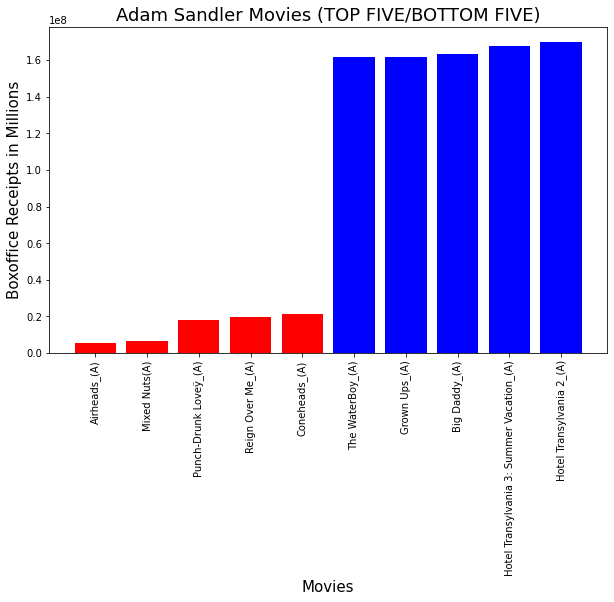

<Figure size 720x432 with 0 Axes>

In [41]:
boxoffice = comedian_df2.Boxoffice_Receipt
boxoffice3 = pd.to_numeric(boxoffice, downcast='float')
boxoffice3.head()

number_of_IMDB_votes = comedian_df2.Number_of_IMDB_Votes_1
number_of_IMDB_votes2 = pd.to_numeric(number_of_IMDB_votes, downcast='float')

IMDB_Rating = comedian_df2.IMDB_Rating
IMDB_Rating2 = pd.to_numeric(IMDB_Rating, downcast='float')

boxoffice3.describe()
IMDB_Rating2.describe()
large5 = comedian_df2.nlargest(5,"Boxoffice_Receipt")
large5

small5 = comedian_df2.nsmallest(5,"Boxoffice_Receipt")
topfive = large5.drop(['Number_of_IMDB_Votes_1', 'IMDB_Rating'], axis=1)
small5
bottomfive = small5.drop(['Number_of_IMDB_Votes_1', 'IMDB_Rating'], axis=1)


vertical_stack = pd.concat([topfive, bottomfive], axis=0)


vert = vertical_stack.sort_values(by='Boxoffice_Receipt')
vert


plt.figure(figsize=(10,6))
# bar plot with matplotlib
Barticks = ('Hotel Transylvania 2','Coneheads','Reign Over Me','Punch-Drunk Love','Mixed Nuts','Airheads','The WaterBoy','Grown Ups','Big Daddy',
            'Hotel Transylvania 3: Summer Vacation',
           )
plt.bar('Movies', 'Boxoffice_Receipt',data=vert, color = ['red','red','red','red','red', 'blue','blue','blue','blue','blue'], width = 0.8)
plt.xlabel("Movies", size=15)
plt.ylabel("Boxoffice Receipts in Millions", size=15)
plt.title("Adam Sandler Movies (TOP FIVE/BOTTOM FIVE)", size=18)
plt.xticks(rotation=90)


plt.figure(figsize=(10,6))


In [75]:


boxoffice4 = boxoffice3.mean()
boxoffice6 = boxoffice3.median()

boxoffice8 = boxoffice3.std()
IMDB_Rating2.describe()
boxoffice3.describe()

count           35.0
mean      83554032.0
std       56020616.0
min        5751882.0
25%       31259911.0
50%       78747584.0
75%      134657176.0
max      169700112.0
Name: Boxoffice_Receipt, dtype: float64

In [76]:
number_of_IMDB_votes2.describe()

number_of_IMDB_votes3 = number_of_IMDB_votes2.mean()
number_of_IMDB_votes4 = number_of_IMDB_votes2.median()
number_of_IMDB_votes5 = number_of_IMDB_votes2.std()

In [19]:
IMDB_Rating2.describe()


count    35.000000
mean      6.145714
std       0.783785
min       3.300000
25%       5.650000
50%       6.300000
75%       6.450000
max       7.500000
Name: IMDB_Rating, dtype: float64

In [43]:
#NFHS3 Under fed and wellfed average data
Adam_Sandler_table_90s = pd.DataFrame({"A.S. Movies Ave":[boxoffice4],
                                      "A.S. Movies Median": [boxoffice6],
                                      "A.S. Movies Standard Dev":[boxoffice8]
                                      })
Adam_Sandler_table_90s.head()

,A.S. Movies Ave,A.S. Movies Median,A.S. Movies Standard Dev
0,83554032.0,78747584.0,56020616.0


In [44]:
Adam_Sandler_table_90s = pd.DataFrame({"A.S. IMDB Movies Ave":[number_of_IMDB_votes2],
                                      "A.S. 90s Movies Median":[number_of_IMDB_votes2],
                                      "A.S. 90s Movies Standard Dev":[boxoffice8]
                                      })
Adam_Sandler_table_90s.head()

,A.S. IMDB Movies Ave,A.S. 90s Movies Median,A.S. 90s Movies Standard Dev
0,0 48862.0 1 44701.0 2 9997.0 3...,0 48862.0 1 44701.0 2 9997.0 3...,56020616.0


[]

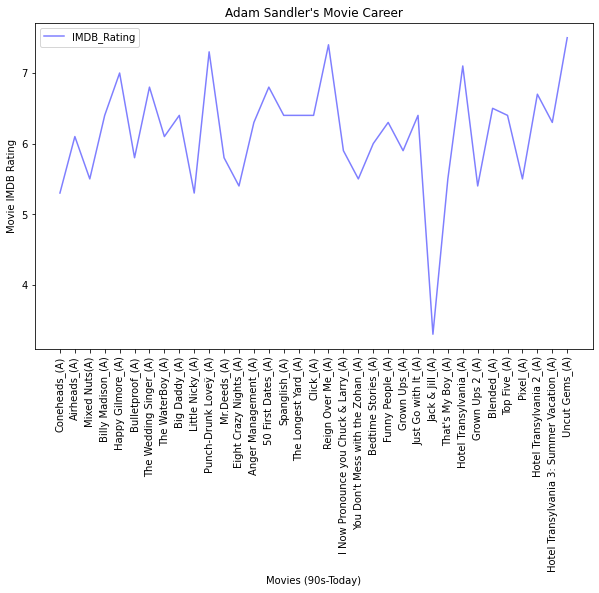

In [60]:
#plot a bar graph of gender ratio of total nfhs3 and 4
# Set x axis and tick locations
x_axis = np.arange(len(comedian_df2['Movies']))
tick_locations = [value for value in x_axis]


movie_chart = comedian_df2.plot(x='Movies',y=['IMDB_Rating'], kind="line",color='blue', title="Adam Sandler's Movie Career",alpha=0.5)
movie_chart.set_xlabel("Movies (90s-Today)")
movie_chart.set_ylabel("Movie IMDB Rating")
plt.rcParams['figure.figsize'] = (10,6)

plt.xticks(tick_locations, comedian_df2['Movies'], rotation="vertical")
movie_chart.plot(figsize=(100,100))


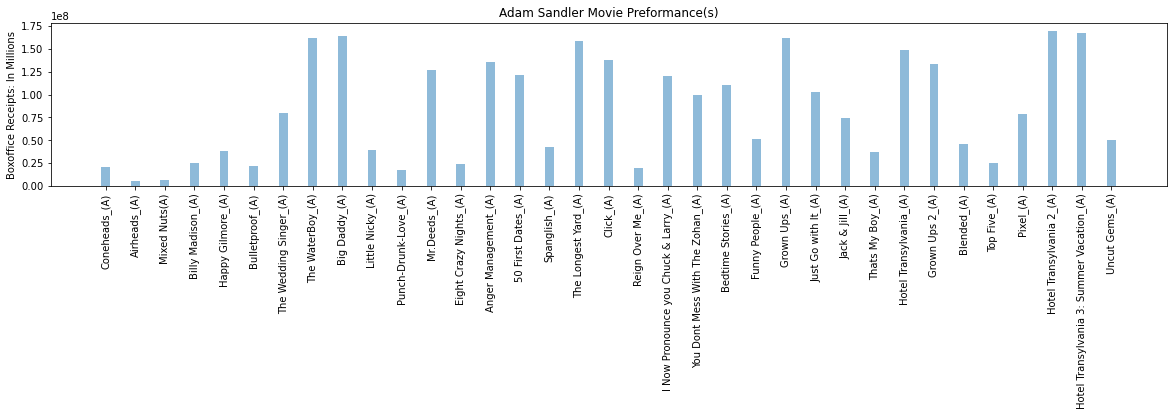

<Figure size 432x288 with 0 Axes>

In [46]:
Adam_ticks = ('Coneheads_(A)','Airheads_(A)','Mixed Nuts(A)','Billy Madison_(A)','Happy Gilmore_(A)','Bulletproof_(A)','The Wedding Singer_(A)',
           'The WaterBoy_(A)','Big Daddy_(A)','Little Nicky_(A)','Punch-Drunk-Love_(A)','Mr.Deeds_(A)','Eight Crazy Nights_(A)',
           'Anger Management_(A)','50 First Dates_(A)','Spanglish_(A)','The Longest Yard_(A)','Click_(A)','Reign Over Me_(A)',
           'I Now Pronounce you Chuck & Larry_(A)','You Dont Mess With The Zohan_(A)','Bedtime Stories_(A)','Funny People_(A)',
           'Grown Ups_(A)','Just Go with It_(A)','Jack & Jill_(A)','Thats My Boy_(A)','Hotel Transylvania_(A)','Grown Ups 2_(A)',
           'Blended_(A)','Top Five_(A)','Pixel_(A)','Hotel Transylvania 2_(A)','Hotel Transylvania 3: Summer Vacation_(A)',
           'Uncut Gems_(A)')
x_pos = np.arange(len(Adam_ticks))
performance = boxoffice3

plt.figure(figsize=(20, 3)) 

plt.bar(x_pos, performance, align='center', alpha=0.5,width=0.3)
plt.xticks(x_pos, Adam_ticks, rotation=90)
plt.ylabel('Boxoffice Receipts: In Millions')
plt.title('Adam Sandler Movie Preformance(s)')

plt.show()

plt.savefig('AdamSandler_Movies.png')

# Set x axis and tick locations
x_axis = np.arange(len(comedian_df2['Movies']))
tick_locations = [value for value in x_axis]


movie_chart = comedian_df2.plot(x='Movies',y=['IMDB_Rating'], kind="line",color='blue', title="Adam Sandler's Movie Career",alpha=0.5)
movie_chart.set_xlabel("Movies (90s-Today)")
movie_chart.set_ylabel("Movie IMDB Rating")
plt.rcParams['figure.figsize'] = (10,6)

plt.xticks(tick_locations, comedian_df2['Movies'], rotation="vertical")
movie_chart.plot(figsize=(100,100))


In [120]:
comedian_will = pd.read_csv('Willferrel.csv')
comedian_will2 = comedian_will.dropna()
comedian_will2.head()

str_io = io.StringIO()

comedian_will2.to_html(buf=str_io, classes='table table-striped')

html_str = str_io.getvalue()

print(html_str)

<table border="1" class="dataframe table table-striped">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Movies</th>
      <th>Boxoffice</th>
      <th>IMDB_Votes</th>
      <th>IMDB_Rating</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Austin Powers: Man of mystery_(W)</td>
      <td>53883989</td>
      <td>214558</td>
      <td>7.0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>A Night at the Roxbury_(W)</td>
      <td>30331165</td>
      <td>55228</td>
      <td>6.3</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Austin Powers: The Spy who_(W)</td>
      <td>206040086</td>
      <td>210762</td>
      <td>6.6</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Dick_(W)</td>
      <td>6262878</td>
      <td>18023</td>
      <td>6.1</td>
    </tr>
    <tr>
      <th>4</th>
      <td>Superstar_(W)</td>
      <td>30636478</td>
      <td>17494</td>
      <td>5.2</td>
    </tr>
    <tr>
      <th>5</th>
      <td>Drowning Mona_(W)</td>

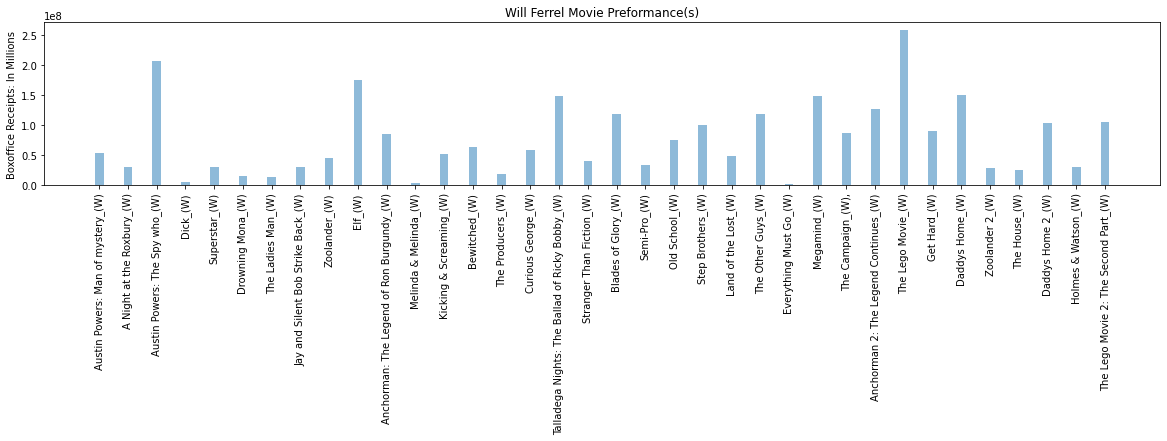

[]

<Figure size 720x432 with 0 Axes>

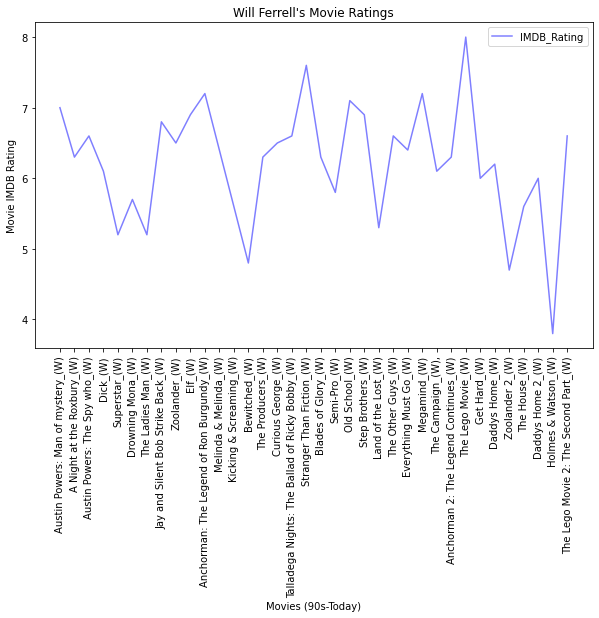

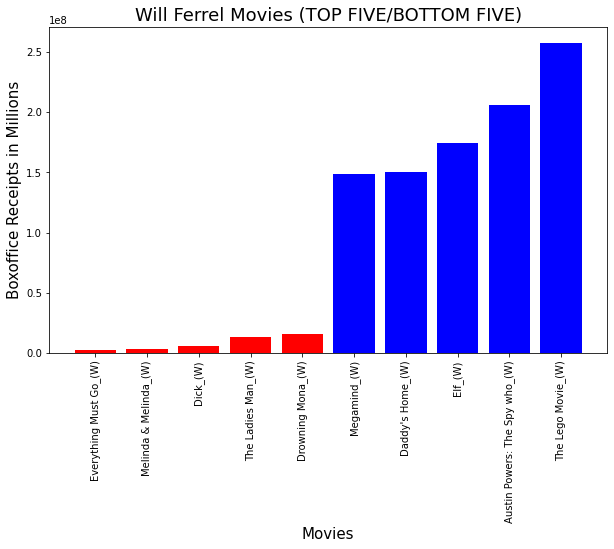

<Figure size 720x432 with 0 Axes>

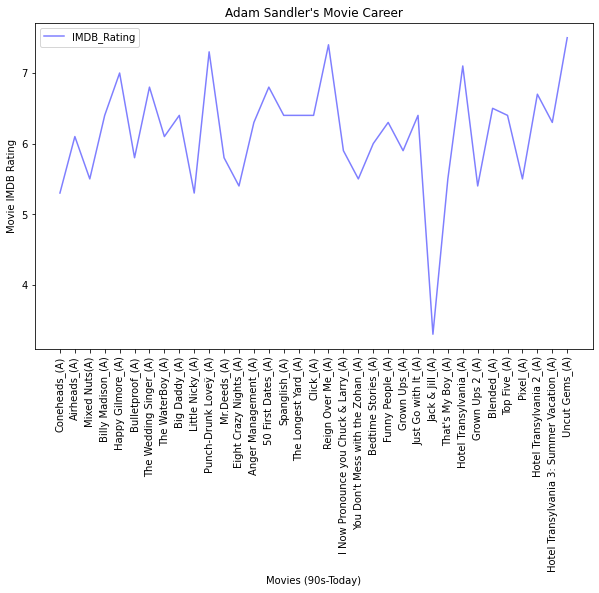

In [85]:
will_ticks = ('Austin Powers: Man of mystery_(W)','A Night at the Roxbury_(W)','Austin Powers: The Spy who_(W)','Dick_(W)',
              'Superstar_(W)','Drowning Mona_(W)','The Ladies Man_(W)','Jay and Silent Bob Strike Back_(W)','Zoolander_(W)',
              'Elf_(W)','Anchorman: The Legend of Ron Burgundy_(W)','Melinda & Melinda_(W)','Kicking & Screaming_(W)',
              'Bewitched_(W)','The Producers_(W)','Curious George_(W)','Talladega Nights: The Ballad of Ricky Bobby_(W)',
              'Stranger Than Fiction_(W)','Blades of Glory_(W)','Semi-Pro_(W)','Old School_(W)','Step Brothers_(W)',
              'Land of the Lost_(W)','The Other Guys_(W)','Everything Must Go_(W)','Megamind_(W)','The Campaign_(W),',
              'Anchorman 2: The Legend Continues_(W)','The Lego Movie_(W)','Get Hard_(W)','Daddys Home_(W)','Zoolander 2_(W)',
              'The House_(W)','Daddys Home 2_(W)','Holmes & Watson_(W)','The Lego Movie 2: The Second Part_(W)')

x_pos2 = np.arange(len(will_ticks))


performance2 = comedian_will2.Boxoffice 

plt.figure(figsize=(20, 3)) 

plt.bar(x_pos2, performance2, align='center', alpha=0.5,width=0.3)
plt.xticks(x_pos2, will_ticks, rotation=90)
plt.ylabel('Boxoffice Receipts: In Millions')
plt.title('Will Ferrel Movie Preformance(s)')

plt.show()

plt.savefig('WillFerrellMovies.png')

#plot a bar graph of gender ratio of total nfhs3 and 4
# Set x axis and tick locations
x_axis2 = np.arange(len(comedian_will2['Movies']))
tick_locations = [value for value in x_axis2]


movie_chart2 = comedian_will2.plot(x='Movies',y=['IMDB_Rating'], kind="line",color='blue', title="Will Ferrell's Movie Ratings",alpha=0.5)
movie_chart2.set_xlabel("Movies (90s-Today)")
movie_chart2.set_ylabel("Movie IMDB Rating")
plt.rcParams['figure.figsize'] = (10,6)

plt.xticks(tick_locations, will_ticks, rotation="vertical")
movie_chart2.plot(figsize=(100,100))

large6 = comedian_will2.nlargest(5,"Boxoffice")
large6

small6 = comedian_will2.nsmallest(5,"Boxoffice")
topfive2 = large6.drop(['IMDB_Votes', 'IMDB_Rating'], axis=1)
small6
bottomfive2 = small6.drop(['IMDB_Votes', 'IMDB_Rating'], axis=1)


vertical_stack2 = pd.concat([topfive2, bottomfive2], axis=0)


vert2 = vertical_stack2.sort_values(by='Boxoffice')
vert2


plt.figure(figsize=(10,6))
# bar plot with matplotlib
Barticks2 = ('Everything Must Go','Melinda & Melinda','Dick','The Ladies Man','Drowning Mona','Megamind','Daddys Home',
                'Elf','Austin Powers: The Spy who','The Lego Movie'
            )
plt.bar('Movies', 'Boxoffice',data=vert2, color = ['red','red','red','red','red', 'blue','blue','blue','blue','blue'], width = 0.8)
plt.xlabel("Movies", size=15)
plt.ylabel("Boxoffice Receipts in Millions", size=15)
plt.title("Will Ferrel Movies (TOP FIVE/BOTTOM FIVE)", size=18)
plt.xticks(rotation=90)


plt.figure(figsize=(10,6))

#plot a bar graph of gender ratio of total nfhs3 and 4
# Set x axis and tick locations
x_axis = np.arange(len(comedian_df2['Movies']))
tick_locations = [value for value in x_axis]


movie_chart = comedian_df2.plot(x='Movies',y=['IMDB_Rating'], kind="line",color='blue', title="Adam Sandler's Movie Career",alpha=0.5)
movie_chart.set_xlabel("Movies (90s-Today)")
movie_chart.set_ylabel("Movie IMDB Rating")
plt.rcParams['figure.figsize'] = (10,6)

plt.xticks(tick_locations, comedian_df2['Movies'], rotation=90)
movie_chart.plot(figsize=(100,100))





In [119]:
comedian_jim = pd.read_csv('JimCarrey.csv')
comedian_jim2 = comedian_jim.dropna()
comedian_jim2.head()




str_io = io.StringIO()

comedian_jim2.to_html(buf=str_io, classes='table table-striped')

html_str = str_io.getvalue()

print(html_str)


<table border="1" class="dataframe table table-striped">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Movies</th>
      <th>Boxoffice</th>
      <th>IMDB_Votes</th>
      <th>IMDB_Rate</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Ace Ventura: Pet Detective_(J)</td>
      <td>72217396</td>
      <td>266738</td>
      <td>6.9</td>
    </tr>
    <tr>
      <th>1</th>
      <td>The Mask_(J)</td>
      <td>119938730</td>
      <td>330309</td>
      <td>6.9</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Dumb and Dumber_(J)</td>
      <td>127175374</td>
      <td>341844</td>
      <td>7.3</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Batman Forever_(J)</td>
      <td>184069126</td>
      <td>228161</td>
      <td>5.4</td>
    </tr>
    <tr>
      <th>4</th>
      <td>Ace Ventura: When Nature Calls_(J)</td>
      <td>108385533</td>
      <td>195849</td>
      <td>6.4</td>
    </tr>
    <tr>
      <th>5</th>
      <td>The Cable Guy_

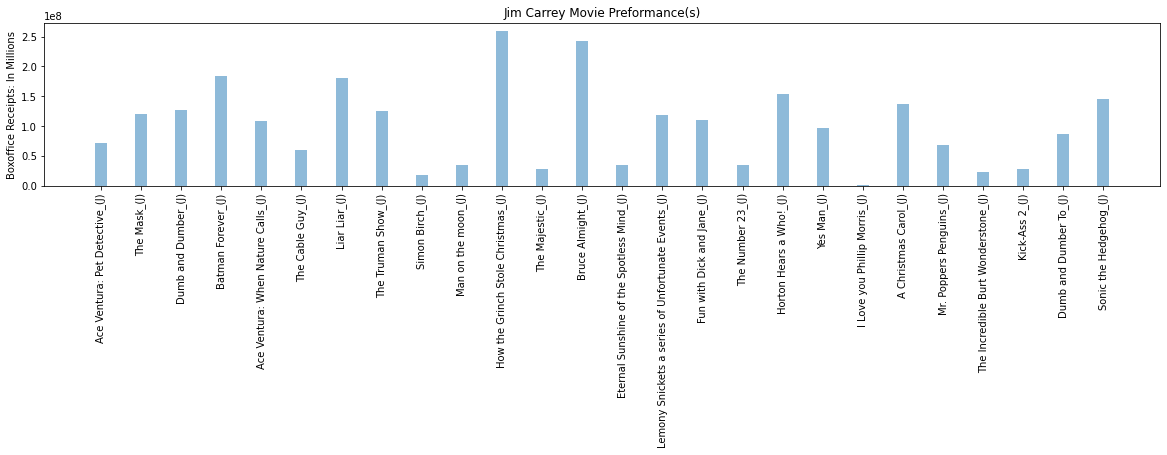

<Figure size 720x432 with 0 Axes>

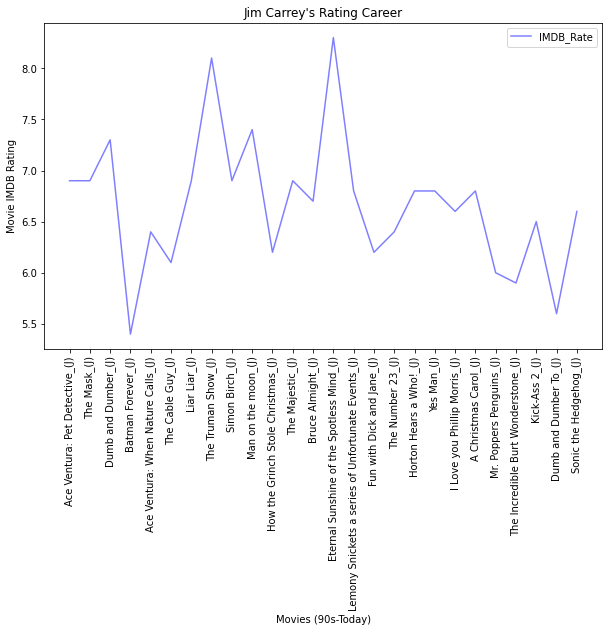

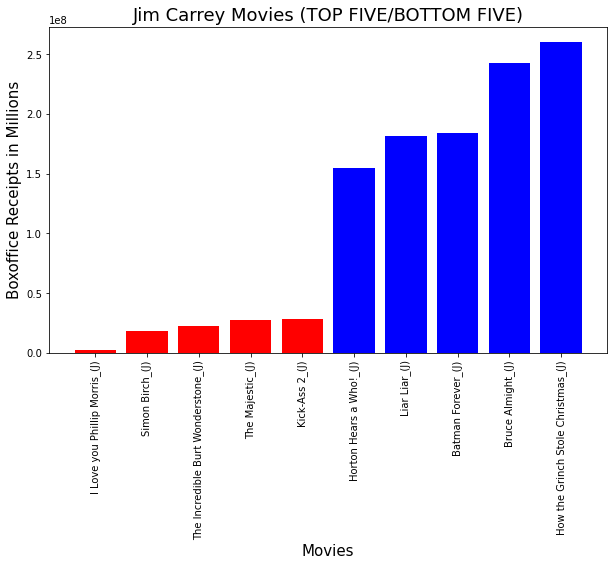

<Figure size 720x432 with 0 Axes>

In [87]:
jim_ticks = ('Ace Ventura: Pet Detective_(J)','The Mask_(J)','Dumb and Dumber_(J)','Batman Forever_(J)','Ace Ventura: When Nature Calls_(J)',
             'The Cable Guy_(J)','Liar Liar_(J)','The Truman Show_(J)','Simon Birch_(J)','Man on the moon_(J)','How the Grinch Stole Christmas_(J)',
             'The Majestic_(J)','Bruce Almight_(J)','Eternal Sunshine of the Spotless Mind_(J)','Lemony Snickets a series of Unfortunate Events_(J)',
             'Fun with Dick and Jane_(J)','The Number 23_(J)','Horton Hears a Who!_(J)','Yes Man_(J)','I Love you Phillip Morris_(J)',
             'A Christmas Carol_(J)','Mr. Poppers Penguins_(J)','The Incredible Burt Wonderstone_(J)','Kick-Ass 2_(J)','Dumb and Dumber To_(J)',
             'Sonic the Hedgehog_(J)')

x_pos3 = np.arange(len(jim_ticks))


performance3 = comedian_jim2.Boxoffice 

plt.figure(figsize=(20, 3)) 

plt.bar(x_pos3, performance3, align='center', alpha=0.5,width=0.3)
plt.xticks(x_pos3, jim_ticks, rotation=90)
plt.ylabel('Boxoffice Receipts: In Millions')
plt.title('Jim Carrey Movie Preformance(s)')

plt.show()

x_axis2 = np.arange(len(comedian_jim2['Movies']))
tick_locations = [value for value in x_axis2]


movie_chart2 = comedian_jim2.plot(x='Movies',y=['IMDB_Rate'], kind="line",color='blue', title="Jim Carrey's Rating Career",alpha=0.5)
movie_chart2.set_xlabel("Movies (90s-Today)")
movie_chart2.set_ylabel("Movie IMDB Rating")
plt.rcParams['figure.figsize'] = (10,6)

plt.xticks(tick_locations, jim_ticks, rotation=90)
movie_chart2.plot(figsize=(100,100))

large7 = comedian_jim2.nlargest(5,"Boxoffice")
large7

small8 = comedian_jim2.nsmallest(5,"Boxoffice")
topfive3 = large7.drop(['IMDB_Votes', 'IMDB_Rate'], axis=1)
small8
bottomfive3 = small8.drop(['IMDB_Votes', 'IMDB_Rate'], axis=1)


vertical_stack3 = pd.concat([topfive3, bottomfive3], axis=0)


vert3 = vertical_stack3.sort_values(by='Boxoffice')
vert3

vert3 = vertical_stack3.sort_values(by='Boxoffice')
vert3

plt.figure(figsize=(10,6))
# bar plot with matplotlib
Barticks2 = ('I Love you Phillip Morris','Simon Birch','The Incredible Burt Wonderstone','The Majestic','Kick-Ass 2','Horton Hears a Who!',
            'Liar Liar','Batman Forever','Bruce Almighty','How the Grinch Stole Christmas')
plt.bar('Movies', 'Boxoffice',data=vert3, color = ['red','red','red','red','red', 'blue','blue','blue','blue','blue'], width = 0.8)
plt.xlabel("Movies", size=15)
plt.ylabel("Boxoffice Receipts in Millions", size=15)
plt.title("Jim Carrey Movies (TOP FIVE/BOTTOM FIVE)", size=18)
plt.xticks(rotation=90)


plt.figure(figsize=(10,6))



In [118]:
comedian_Ben = pd.read_csv('BenStiller.csv')
comedian_Ben2 = comedian_Ben.dropna()
comedian_Ben2.head()

str_io = io.StringIO()

comedian_Ben2.to_html(buf=str_io, classes='table table-striped')

html_str = str_io.getvalue()

print(html_str)

<table border="1" class="dataframe table table-striped">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Movies</th>
      <th>Boxoffice</th>
      <th>IMDB_Vote</th>
      <th>IMDB_Rating</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Reality Bites_(B)</td>
      <td>20982557</td>
      <td>44049</td>
      <td>6.6</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Heavyweights_(B)</td>
      <td>17689177</td>
      <td>24147</td>
      <td>6.6</td>
    </tr>
    <tr>
      <th>2</th>
      <td>If Lucy Fell_(B)</td>
      <td>2420162</td>
      <td>3717</td>
      <td>4.9</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Flirting With Diaster_(B)</td>
      <td>14702438</td>
      <td>17117</td>
      <td>6.7</td>
    </tr>
    <tr>
      <th>4</th>
      <td>The Cable Guy_(B)</td>
      <td>60240295</td>
      <td>146799</td>
      <td>6.1</td>
    </tr>
    <tr>
      <th>5</th>
      <td>Zero Effect_(B)</td>
      <td>2087471</td>
 

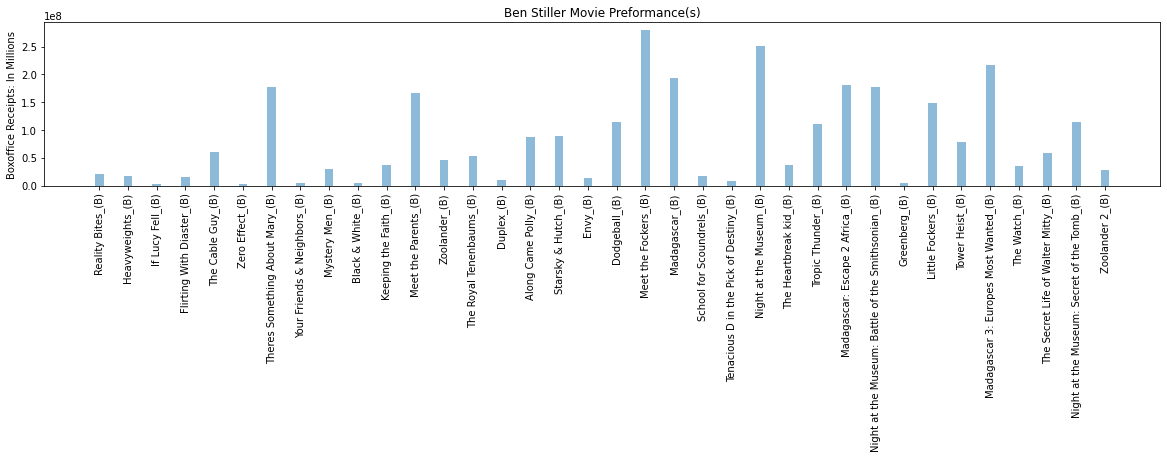

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

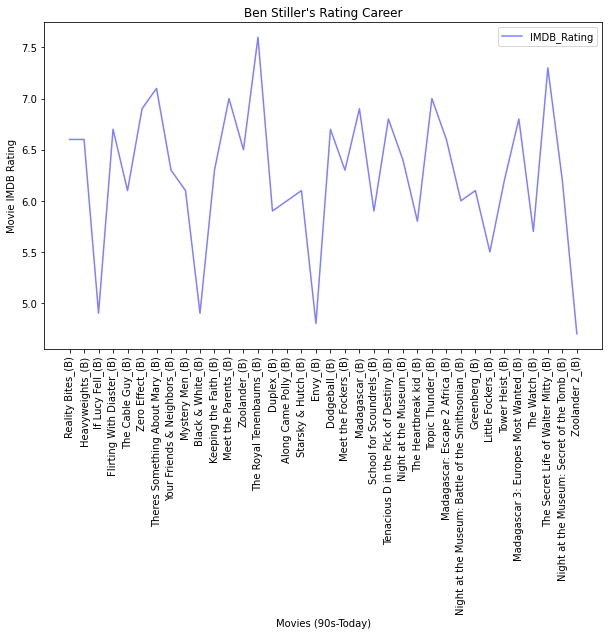

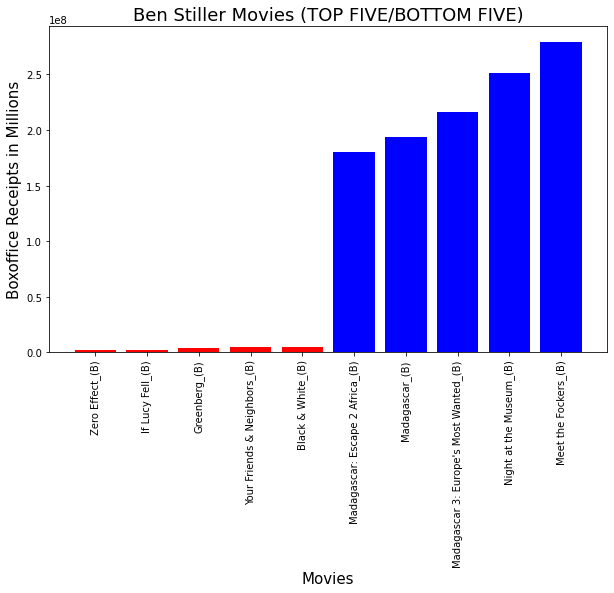

<Figure size 720x432 with 0 Axes>

In [101]:
ben_ticks = ('Reality Bites_(B)','Heavyweights_(B)','If Lucy Fell_(B)','Flirting With Diaster_(B)','The Cable Guy_(B)','Zero Effect_(B)',
             'Theres Something About Mary_(B)','Your Friends & Neighbors_(B)','Mystery Men_(B)','Black & White_(B)','Keeping the Faith_(B)',
             'Meet the Parents_(B)','Zoolander_(B)','The Royal Tenenbaums_(B)','Duplex_(B)','Along Came Polly_(B)','Starsky & Hutch_(B)',
             'Envy_(B)','Dodgeball_(B)','Meet the Fockers_(B)','Madagascar_(B)','School for Scoundrels_(B)',
             'Tenacious D in the Pick of Destiny_(B)','Night at the Museum_(B)','The Heartbreak kid_(B)','Tropic Thunder_(B)',
             'Madagascar: Escape 2 Africa_(B)','Night at the Museum: Battle of the Smithsonian_(B)','Greenberg_(B)',
             'Little Fockers_(B)','Tower Heist_(B)','Madagascar 3: Europes Most Wanted_(B)','The Watch_(B)',
             'The Secret Life of Walter Mitty_(B)','Night at the Museum: Secret of the Tomb_(B)','Zoolander 2_(B)')


x_pos4 = np.arange(len(ben_ticks))


performance4 = comedian_Ben2.Boxoffice 

plt.figure(figsize=(20, 3)) 

plt.bar(x_pos4, performance4, align='center', alpha=0.5,width=0.3)
plt.xticks(x_pos4, ben_ticks, rotation=90)
plt.ylabel('Boxoffice Receipts: In Millions')
plt.title('Ben Stiller Movie Preformance(s)')

plt.show()

plt.savefig('BenStillerMovies.png')


x_axis2 = np.arange(len(comedian_Ben2['Movies']))
tick_locations = [value for value in x_axis2]


movie_chart2 = comedian_Ben2.plot(x='Movies',y=['IMDB_Rating'], kind="line",color='blue', title="Ben Stiller's Rating Career",alpha=0.5)
movie_chart2.set_xlabel("Movies (90s-Today)")
movie_chart2.set_ylabel("Movie IMDB Rating")
plt.rcParams['figure.figsize'] = (10,6)

plt.xticks(tick_locations, ben_ticks, rotation=90)
movie_chart2.plot(figsize=(100,100))

large8 = comedian_Ben2.nlargest(5,"Boxoffice")
large8

small9 = comedian_Ben2.nsmallest(5,"Boxoffice")
small9
topfive5 = large8.drop(['IMDB_Vote', 'IMDB_Rating'], axis=1)
bottomfive5 = small9.drop(['IMDB_Vote', 'IMDB_Rating'], axis=1)

vertical_stack5 = pd.concat([topfive5, bottomfive5], axis=0)


vert4 = vertical_stack5.sort_values(by='Boxoffice')
vert4

plt.figure(figsize=(10,6))
# bar plot with matplotlib
Barticks3 = ('Zero Effect','If Lucy Fell','Greenberg','Your Friends & Neighbors','Black & White','Madagascar: Escape 2 Africa',
             'Madagascar_(B)','Madagascar 3: Europes Most Wanted','Night at the Museum','Meet the Fockers')
plt.bar('Movies', 'Boxoffice',data=vert4, color = ['red','red','red','red','red', 'blue','blue','blue','blue','blue'], width = 0.8)
plt.xlabel("Movies", size=15)
plt.ylabel("Boxoffice Receipts in Millions", size=15)
plt.title("Ben Stiller Movies (TOP FIVE/BOTTOM FIVE)", size=18)
plt.xticks(rotation=90)


plt.figure(figsize=(10,6))


